<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Evaluaciones/C3/Evaluacion_final_pauta_V17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 1
## Introducción
En esta seción usted generará un breve anáisis descriptivo de la evolución de la expectativa de vida de diferentes países. Para ello usted utilizará la información disponible en el dataset `gapminder` del package del mismo nombre. La información contenida en este dataset corresponde a la siguiente:

   * **country:** Factor con 142 niveles

   * **continent:** Factor con 5 niveles

   * **year:** Rangos de años desde 1952 to 2007 en incrementos de  5 años

   * **lifeExp:** Esperanza de vida al nacer, en años

   * **pop:** Población

   * **gdpPercap:** GDP per capita (US$, ajustado por inflación)

In [ ]:
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
library(gapminder)
data(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


**P1) (2pts)** El siguiente representa la relación entre el el ingreso GDP y la esperanza de vida para **todos los países** a lo largo de **todos los años**, adicionalmente el tamaño de cada punto está en proporción con la poblción total de cada país. Adicionalmente, el color varía en función del año del registro.
En el gráfico se pueden apreciar observaciones con alto GDP (aquellas encerradas en el recuadro rojo). Identifíque dichas observaciones e indique claramente a qué país(es) y año(s) corresponden.

NOTA: Usted tiene libertad de escoger el método con el cual identificar dichas observaciones.



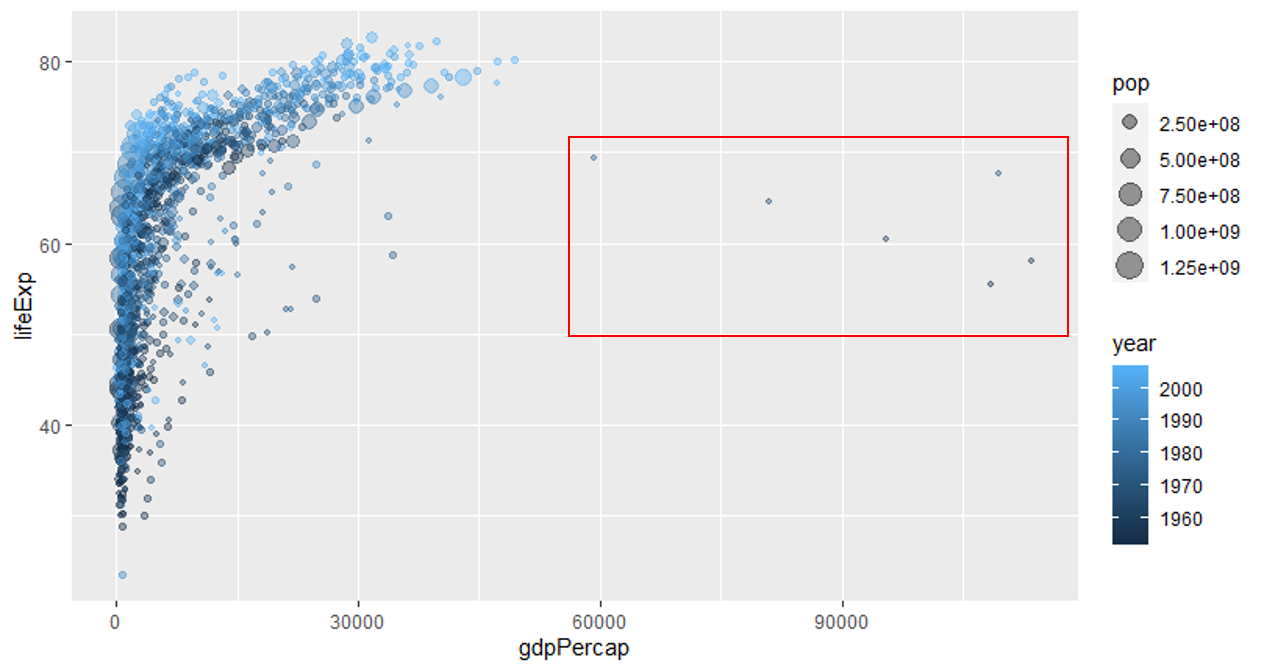

In [ ]:
# P1 --------------------------------------------------
# Respuesta
library(dplyr)
library(ggplot2)
# De acuerdo al gráfico, corresponden a observaciones con un GDP no menor a 50000 US, por tanto es posible identificar dichas observaciones simplemente filtrando el dataset gapminder

filter(gapminder, gdpPercap > 50000) # Las 6 observaciones corresponden a Kuwait, en los años 1952,57,62,67,72 y 77.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Kuwait,Asia,1952,55.565,160000,108382.35
Kuwait,Asia,1957,58.033,212846,113523.13
Kuwait,Asia,1962,60.470,358266,95458.11
Kuwait,Asia,1967,64.624,575003,80894.88
Kuwait,Asia,1972,67.712,841934,109347.87
Kuwait,Asia,1977,69.343,1140357,59265.48


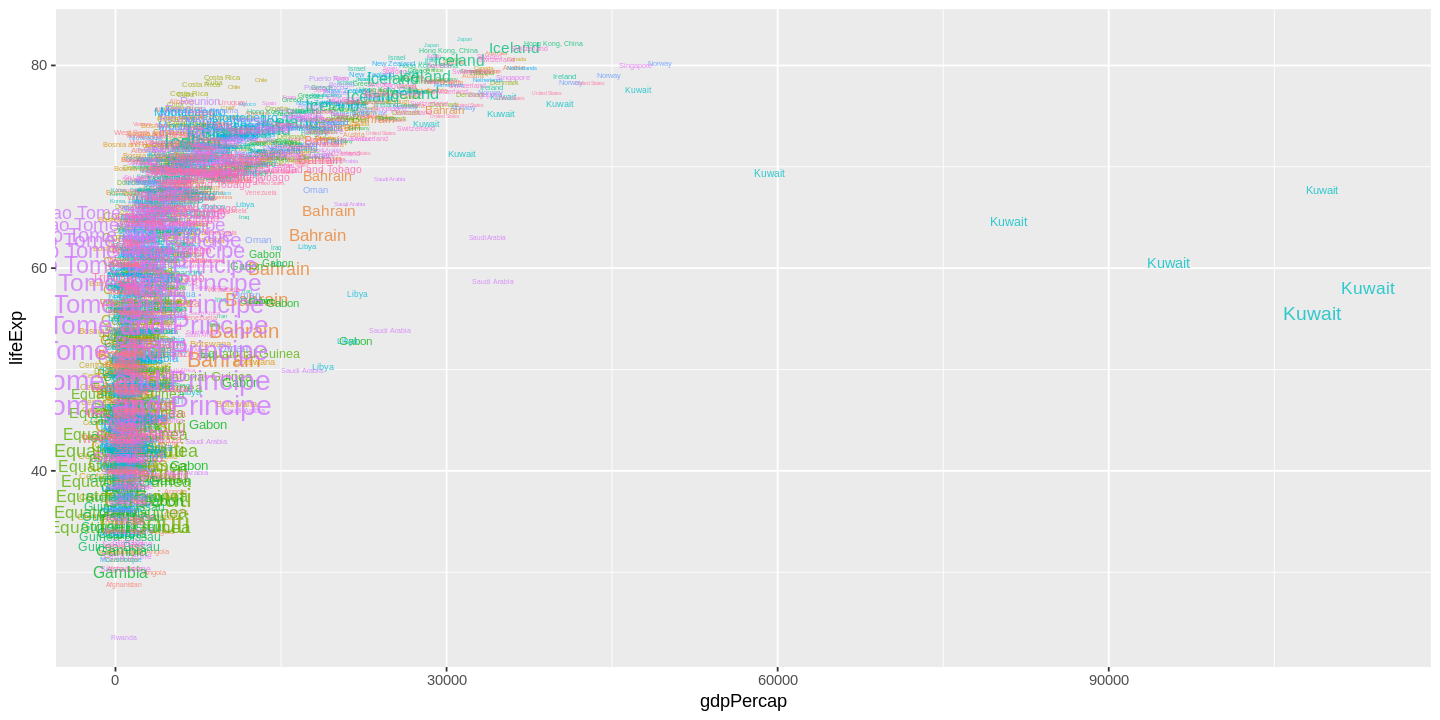

In [ ]:
# Una opción gráfica # Se recomienda ejecutar estos gráficos en RStudio
gapminder %>%
  ggplot() +
  aes(x = gdpPercap,
      y = lifeExp,
      size =  1/pop, # solo para mostrar en mayor tamaño los países con baja población
      color = country,
      label = country) +
  geom_text(alpha = 0.8, show.legend = F)

**P2) (3pts)** Mediante un gráfico de puntos, visualice una comparativa entre la relación de ingresos y expectativa de vida, para los ños 1052 y 2007. Para ello usted deberá replicar el siguiente gráfico, donde el color representa a un continente distinto y el tamaño está dado por el total de población.

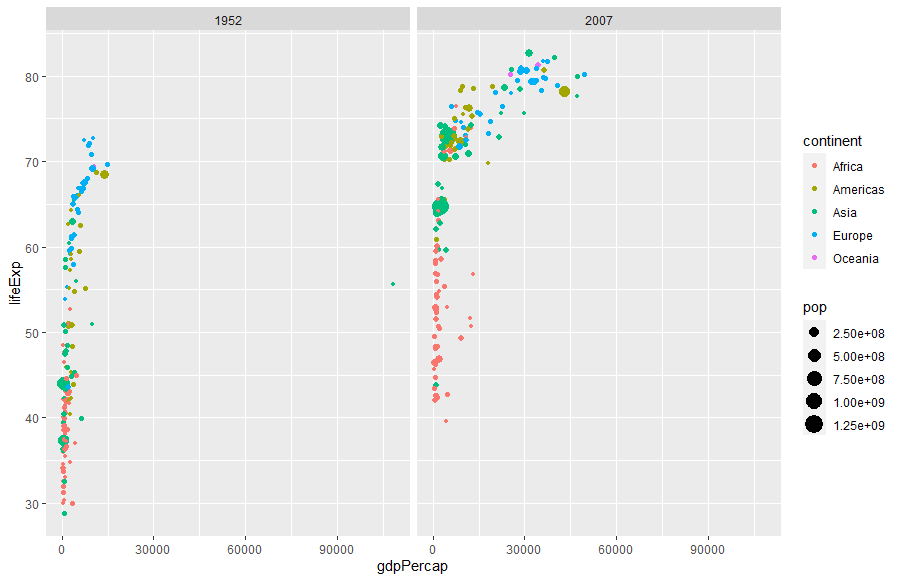

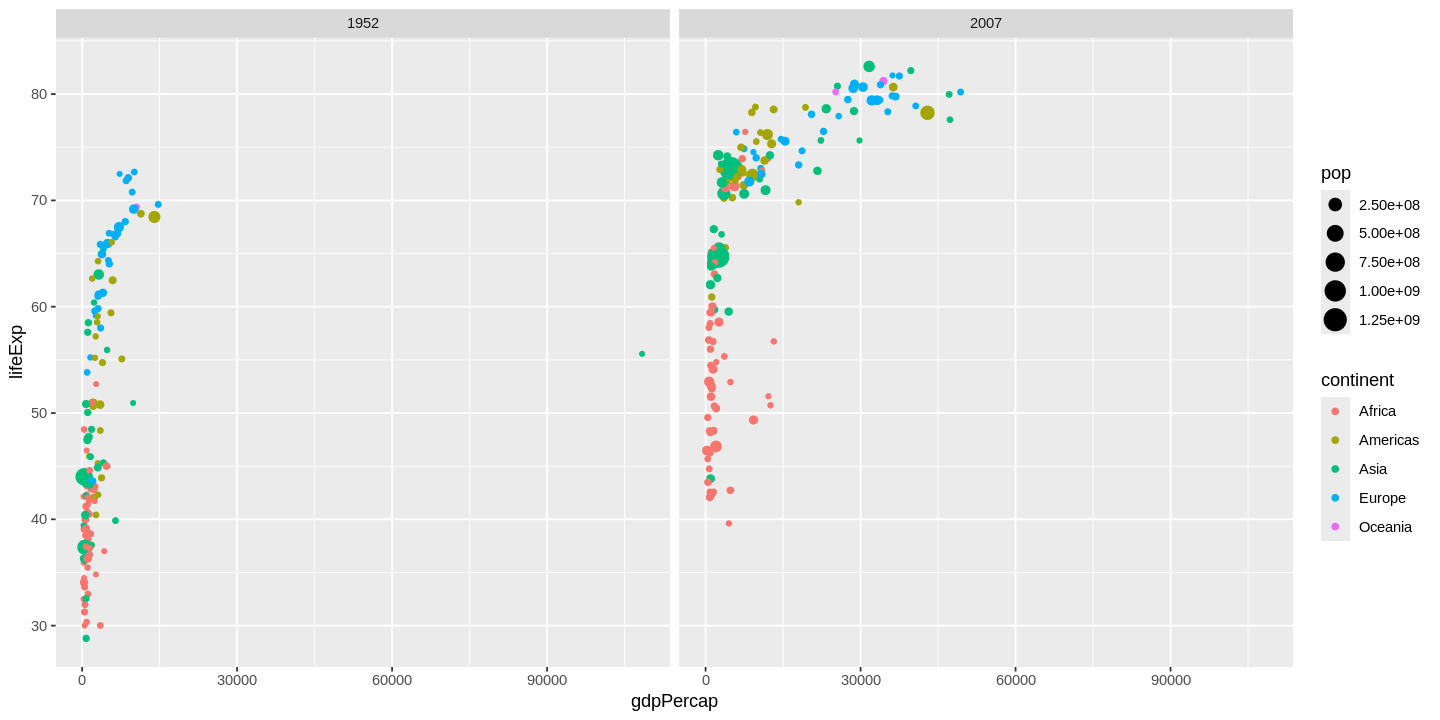

In [ ]:
# P2 --------------------------------------------------
# Respuesta
gapminder %>%
    filter(year %in% c(1952,2007)) %>%
    ggplot() +
    aes(x = gdpPercap,
        y = lifeExp,
        size =  pop,
        color = continent) +
    geom_point() +
    facet_wrap(~ year)


**P3) (2pts)** Determine el nivel de correlación de **spearman**, entre las variables `gdpPercap` y `lifeExp` para cada uno de los años registrados. ¿En qué año se observa el mayor nivel de correlación entre ambas variables?

In [ ]:
# P3 --------------------------------------------------
# Respuesta
gapminder %>%
  group_by(year) %>%
  summarise(corr_pearson = cor(gdpPercap,lifeExp),
            corr_spearman = cor(gdpPercap,lifeExp,method = "spearman")) %>%
  arrange(-corr_spearman)

# se puede observar que el myor nivel de correlaciíon se da en el año 1992

year,corr_pearson,corr_spearman
<int>,<dbl>,<dbl>
1992,0.7047148,0.8972412
1997,0.7036436,0.8950651
1987,0.7499054,0.8924654
2002,0.6818578,0.8652741
1982,0.7227629,0.8607685
2007,0.6786624,0.8565899
1977,0.6198638,0.8275408
1972,0.4597014,0.8067231
1962,0.3832211,0.7969564


**P4)** Para el año obtenido en la pregunta anterior, realice una breve descrición de la distribución de la expectativa de vida `lifeExp`. E indique lo siguiente

   **a) (1pt)** ¿Cuál fue la esperanza de vida promedio considerando todos los países registrados?<br>
   **b) (1pt)** ¿Cuál es el país que en dicho año tuvo la mayor esperanza de vida?<br>



In [ ]:
# P4 --------------------------------------------------
# Respuesta
gapminder %>%
    filter(year == 1992) %>%
    summarise(
        lifeExp_prom = mean(lifeExp),
        pais_mayor_lexp =  country[which.max(lifeExp)],
        pais_menor_lexp =  country[which.min(lifeExp)],
        menor_lexp = min(lifeExp),
        mayor_lexp = max(lifeExp)#23.6
        )
# La esperanza de vida promedio es de 64.16034 para el año 1992.
# Japón fue el país con mayor expectativa de vida con 79.36 pts.

lifeExp_prom,pais_mayor_lexp,pais_menor_lexp,menor_lexp,mayor_lexp
<dbl>,<fct>,<fct>,<dbl>,<dbl>
64.16034,Japan,Rwanda,23.599,79.36


## Histogramas

Se sabe que una manera de estabilizar la variabilidad presente en una variable, es estudiando su logaritmo. A continuación se propone describir en términos visuales la distribución del logaritmo de la expectativa de vida.


Para ello usted deberá graficar los histogramas y curvas asociadas a una distribución normal para el logaritmo de `lifeExp` los continentes de África y Oceanía. Esta variable se define a continuación.





In [ ]:
gapminder <- gapminder %>%
  mutate(log_lifeExp = log(lifeExp))

  **P5) (3pts)** Para los continentes de África y Oceanía, grafique los histogramas de densidades para el logaritmo de `lifeExp` (variable `log_lifeExp` definida anteriormente). Considere añadir una curva de densidad normal con parámetros de media y vrianza igual a la media y desviación estandar muestral. ¿Qué opina sobre el histograma de Oceanía? Comente sobre posibles causas de su aspecto.<br>

In [ ]:
# P5 --------------------------------------------------
# Respuesta
#a)

mu_africa <- mean(gapminder$log_lifeExp[gapminder$continent == "Africa"])
sd_africa <- sd(gapminder$log_lifeExp[gapminder$continent == "Africa"])

mu_oceania <- mean(gapminder$log_lifeExp[gapminder$continent == "Oceania"])
sd_oceania <- sd(gapminder$log_lifeExp[gapminder$continent == "Oceania"])



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


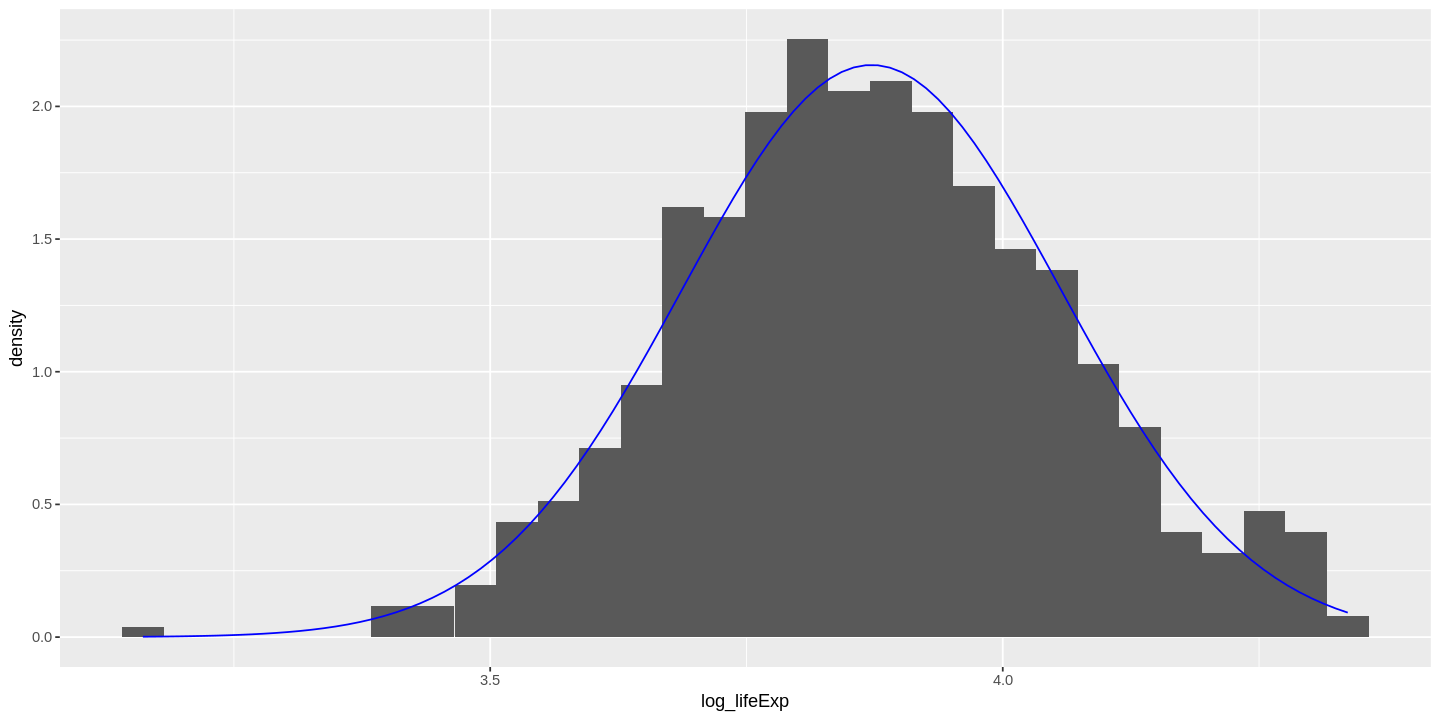

In [ ]:
## Africa

gapminder %>%
  filter(continent == "Africa" ) %>%
    ggplot() +
    aes(x = log_lifeExp) +
    geom_histogram(mapping = aes(y = after_stat(density)))+
    stat_function(fun = dnorm,
                  args = list(mean = mu_africa, sd = sd_africa),
                  col = "blue")



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


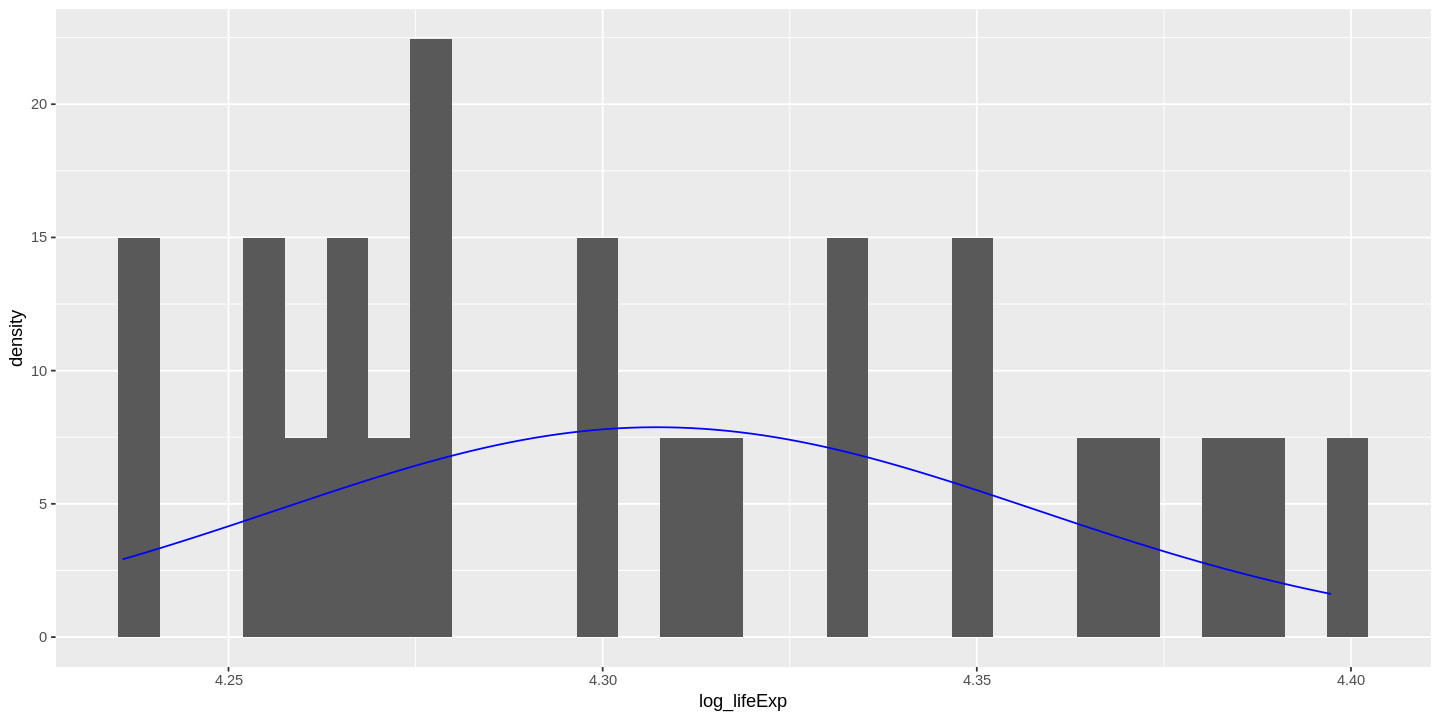

In [ ]:

## Oceania
gapminder %>%
    filter(continent == "Oceania" ) %>%
    ggplot() +
    aes(x = log_lifeExp) +
    geom_histogram(mapping = aes(y = after_stat(density)))+
    stat_function(fun = dnorm,
                  args = list(mean = mu_oceania, sd = sd_oceania),
                  col = "blue")

# La forma que dquiere el histograma de log_lifeExp para el caso de Oceanía se debe a la poca cantidad de registros. A saber, Oceanía presenta sólo 24 registros.


**P6)** La tabla `country_region` contiene la información de la región a la que pertenece cada país registrado en el dataset Gapminder. Esta tabla está disponible en la ruta "https://github.com/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/tree/main/Evaluaciones/C3/datasets".

**a)  (2 pts)** Cruce las tablas gapminder y country_region, por las llaves continent y country, con el objetivo de agregar una nueva columna a la tabla gapminder que contenga la región de cada país.

In [ ]:
# P6 --------------------------------------------------
# Respuesta
#a)
country_region <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/refs/heads/main/Evaluaciones/C3/datasets/country_region.csv")

gapminder2 <- gapminder %>%
  left_join(country_region, by = c("continent", "country"))


**a)  (2 pts)** A continuación se restringirá el análisis a países en vías de desarrollo. Para ello, filtre los registros de gapminder para aquellos en que la región **NO** está dentro de las siguientes:
  - "Western Europe"
  - "Northern Europe"
  - "Southern Europe"
  - "Northern America"
  - "Australia and New Zealand"

Descarte además los siguientes países:

  - "Afghanistan"
  - "Korea, Dem. Rep."
  - "Korea, Rep."
  - "Myanmar"
  - "Reunion"
  - "Sao Tome and Principe"
  - "Somalia"
  - "Taiwan"
  - "Turkey"
  - "Yemen, Rep."

In [ ]:
# P6 --------------------------------------------------
# Respuesta
#b)

#Dejar fuera estos paises
region_excluir <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")
country_excluir <- c(
  "Afghanistan"
,"Korea, Dem. Rep."
,"Korea, Rep."
,"Myanmar"
,"Reunion"
,"Sao Tome and Principe"
,"Somalia"
,"Taiwan"
,"Turkey"
,"Yemen, Rep."
)

gapminder2 <- gapminder2 %>%
  filter(!(region %in% region_excluir) ) %>%
  filter(!(country %in% country_excluir))

**P7) (2pts)** Considerando el dataset anterior, suponga que **para el año 1967** la variable `log_lifeExp` sigue una distribución normal con media y desviación estándar muestrales. Usted decide escoger un país al azar, ¿qué tan probable es que su `log_lifeExp` esté entre 3.9 y 4?

In [ ]:
gapminder %>% dim()
gapminder2 %>% dim()
gapminder2[gapminder2$year == 1967,]  %>% dim()

[1] 1704    7

[1] 1260    8

[1] 105   8

In [ ]:
# P7 --------------------------------------------------
# Respuesta

mu_est <- mean(gapminder2$log_lifeExp[gapminder2$year == 1967])
sd_est <- sd(gapminder2$log_lifeExp[gapminder2$year == 1967])

# La probabilidad de que el log_lifeExp del país se encuentre entre 3.9 y 4 es de
pnorm(4, mean = mu_est, sd = sd_est) - pnorm(3.9, mean = mu_est, sd = sd_est)

[1] 0.2047898

In [ ]:
mu_est
sd_est

[1] 3.937802

[1] 0.192253

# Sección 2
## Cafetería
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión.

In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(arules)
library(dplyr)
library(ggplot2)

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ tidyr::pack()    masks Matrix::pack()
✖ arules::recode() masks dplyr::recode()
✖ tidyr::unpack()  masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


El siguiente archivo contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [ ]:
trans_original <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C3/datasets/cafeteria.csv")
summary(trans_original)

# Notamos que el item NONE aparece 786 veces, por lo que se decide eliminar este registro.

trans_original <- filter(trans_original, Item != "NONE")

     Date               Time            Transaction       Item          
 Length:21293       Length:21293       Min.   :   1   Length:21293      
 Class :character   Class :character   1st Qu.:2548   Class :character  
 Mode  :character   Mode  :character   Median :5067   Mode  :character  
                                       Mean   :4952                     
                                       3rd Qu.:7329                     
                                       Max.   :9684                     

In [ ]:
trans_original %>% arrange(Transaction) %>% head(10)

,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,1,Bread
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:05:34,2,Scandinavian
4,2016-10-30,10:07:57,3,Hot chocolate
5,2016-10-30,10:07:57,3,Jam
6,2016-10-30,10:07:57,3,Cookies
7,2016-10-30,10:08:41,4,Muffin
8,2016-10-30,10:13:03,5,Coffee
9,2016-10-30,10:13:03,5,Pastry


In [ ]:
summary(trans_original)

     Date               Time            Transaction       Item          
 Length:20507       Length:20507       Min.   :   1   Length:20507      
 Class :character   Class :character   1st Qu.:2552   Class :character  
 Mode  :character   Mode  :character   Median :5137   Mode  :character  
                                       Mean   :4976                     
                                       3rd Qu.:7357                     
                                       Max.   :9684                     

**P1) (2pts)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos (en la imagen se muestran sólo algunos registros de la tabla).

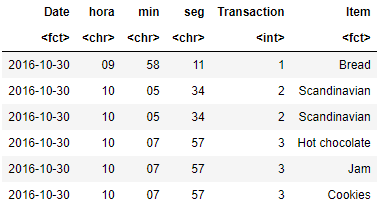

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [ ]:
# P1 --------------------------------------------------
# Respuesta

trans_original <- trans_original %>%
    separate(Time, c("hora", "min","seg"),sep = ":")

head(trans_original)

,Date,hora,min,seg,Transaction,Item
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09,58,11,1,Bread
2,2016-10-30,10,05,34,2,Scandinavian
3,2016-10-30,10,05,34,2,Scandinavian
4,2016-10-30,10,07,57,3,Hot chocolate
5,2016-10-30,10,07,57,3,Jam
6,2016-10-30,10,07,57,3,Cookies


**P2) (4pts)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs.
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [ ]:
# P2 --------------------------------------------------
# Respuesta

resumen <- trans_original %>%
    group_by(hora) %>%
    summarise(total_trx = length(unique(Transaction)),
              total_item = n(),
              total_items_unicos = length(unique(Item))) %>%
    arrange(-total_trx)


resumen %>% arrange(hora)

hora,total_trx,total_item,total_items_unicos
<chr>,<int>,<int>,<int>
01,1,1,1
07,16,24,5
08,375,645,42
09,1006,1966,48
10,1266,2666,63
11,1439,3102,65
12,1325,2854,65
13,1143,2617,68
14,1120,2640,67


**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones.

**a) (1pt)** ¿Qué horas comprende el horario punta?<br>
**b) (2pt)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta?


In [ ]:
# P3 --------------------------------------------------
# Respuesta
#a)
filter(resumen,total_trx >= 1000) # Corresponde al bloque horario comprendido entre las 9:00 y las 14:59 hrs
#b)
# Con hora punta se da una tasa de 1226.5 transaciones por hora en promedio, mientras que en horario normal la tasa fue de 181 transacciones por hora en promedio.
resumen %>%
    mutate(hora_punta = ifelse(hora %in% c("09","10","11","12","13","14"),"hora punta","normal" )) %>%
    group_by(hora_punta) %>%
    summarise(tasa_trx_hra = mean(total_trx),
             coef_var = sd(total_trx)/mean(total_trx),
             sd = sd(total_trx))

# 1216.5 transacciones promedio por hora en horario punta, versus 180.5 transacciones promedio por hora en horario normal

hora,total_trx,total_item,total_items_unicos
<chr>,<int>,<int>,<int>
11,1439,3102,65
12,1325,2854,65
10,1266,2666,63
13,1143,2617,68
14,1120,2640,67
09,1006,1966,48


hora_punta,tasa_trx_hra,coef_var,sd
<chr>,<dbl>,<dbl>,<dbl>
hora punta,1216.5,0.1288012,156.6866
normal,180.5,1.6397624,295.9771


### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P4) (2pt)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

,Item,n
,<chr>,<int>
1,Coffee,5471
2,Bread,3325
3,Tea,1435
4,Cake,1025
5,Pastry,856


Warning message in asMethod(object):
“removing duplicated items in transactions”


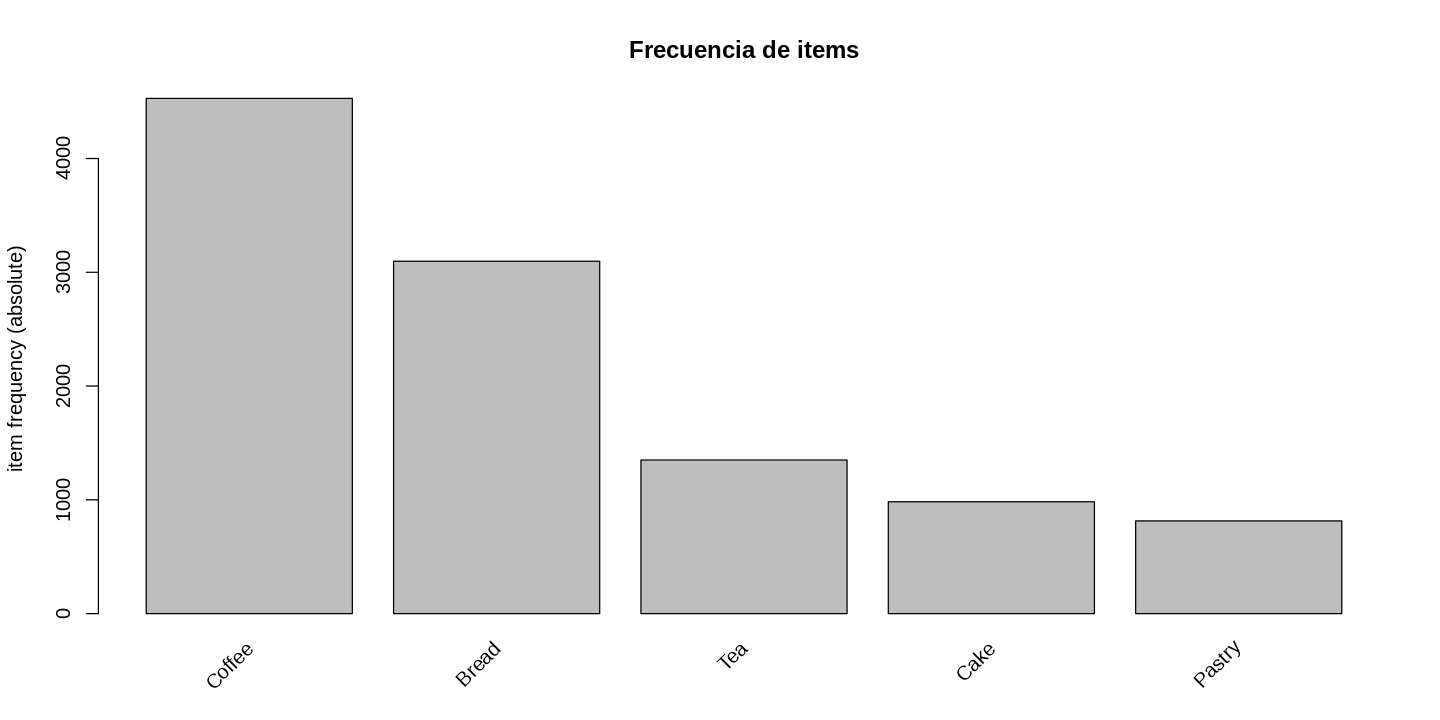

In [ ]:
# Respuesta

# Opción a) sin convertir a objeto transactions

trans_original %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

# Opción b) convirtiendo tras_original a objeto transaction

## NOTA LOS N CAMBIAN YA QUE EN ESTA SEGUNDA FORMA SE ELIMINAN DUPLICADOS Y EL CONTEO SE HACE A NIVEL DE BOLETA

tr <- as(split(trans_original[,"Item"], trans_original[,"Transaction"]), "transactions")

itemFrequencyPlot(tr,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

**P5) (4pts)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

,Item,n
,<chr>,<int>
1,Coffee,1779
2,Bread,1038
3,Pastry,356
4,Tea,332
5,Medialuna,239


,Item,n
,<chr>,<int>
1,Coffee,2823
2,Bread,1661
3,Tea,930
4,Cake,731
5,Sandwich,671


,Item,n
,<chr>,<int>
1,Coffee,87
2,Bread,54
3,Tea,49
4,Cake,30
5,Hot chocolate,23


Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


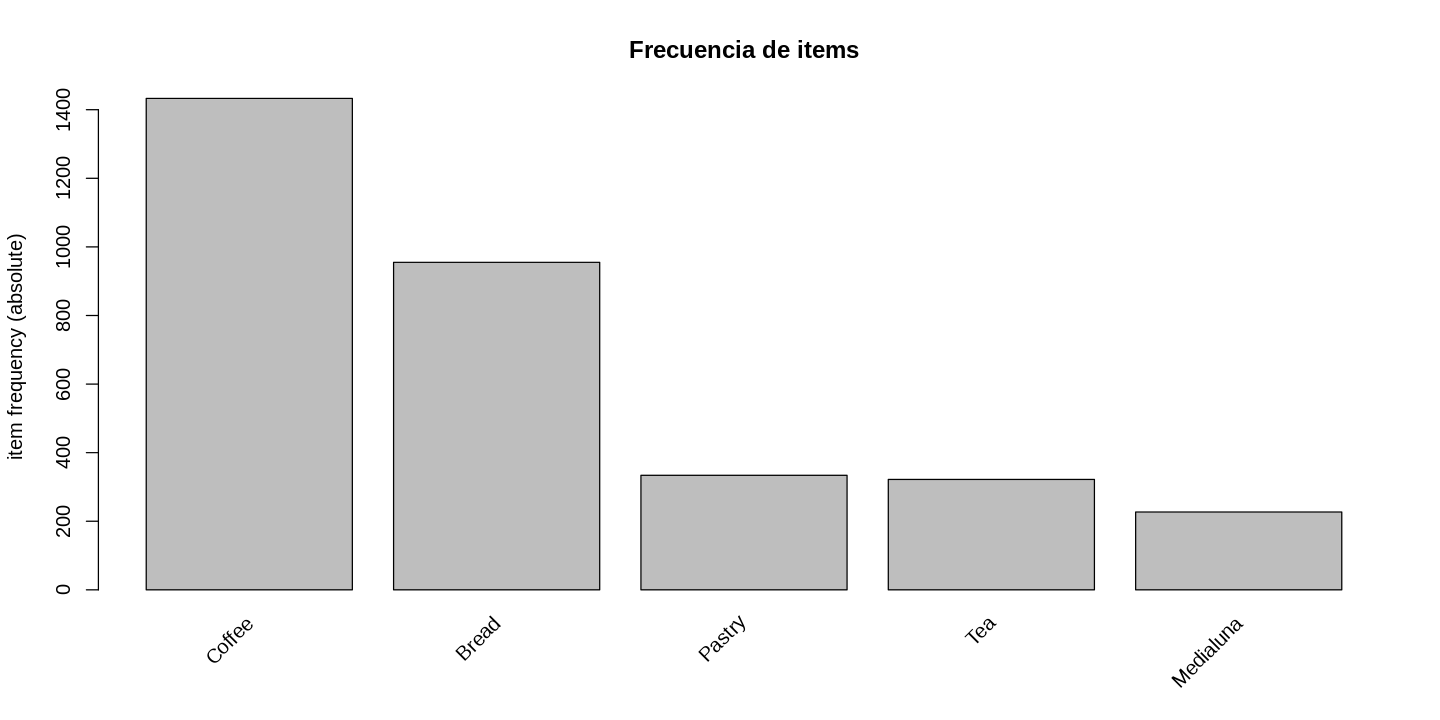

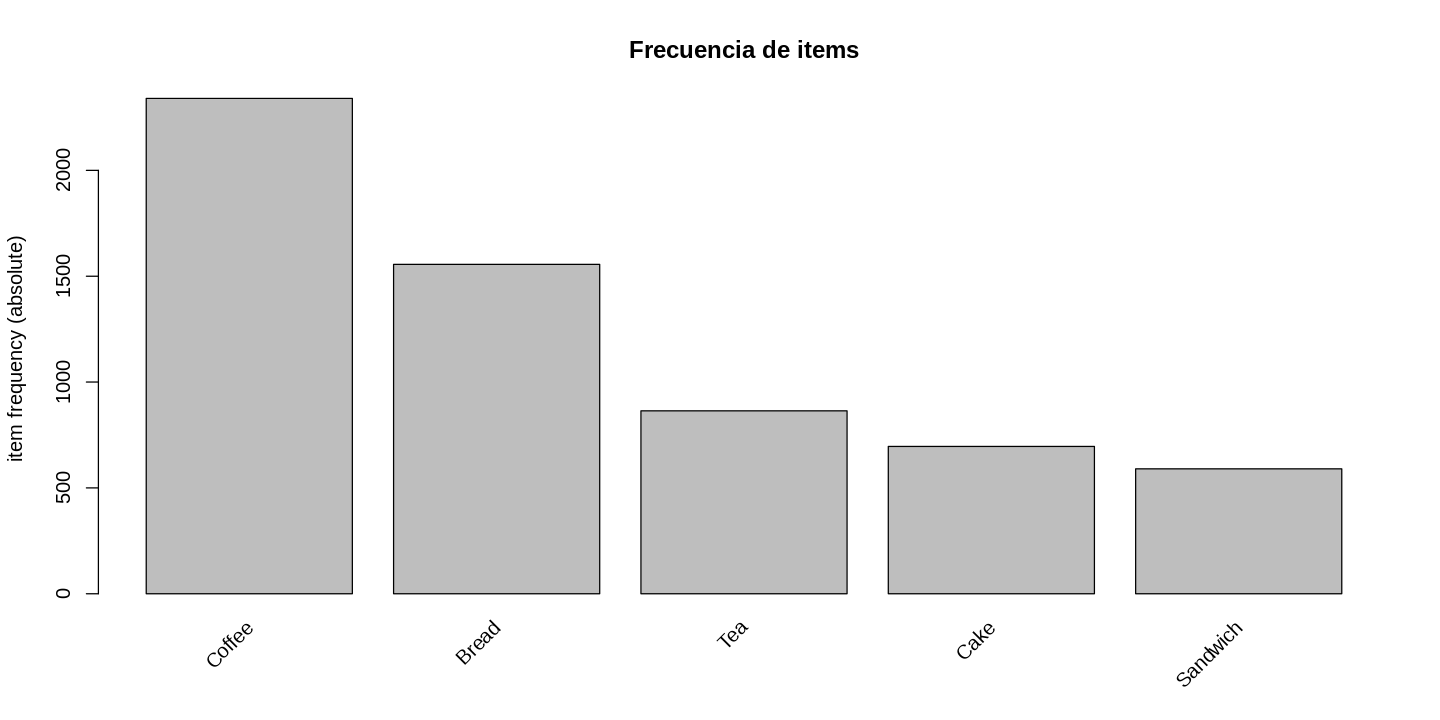

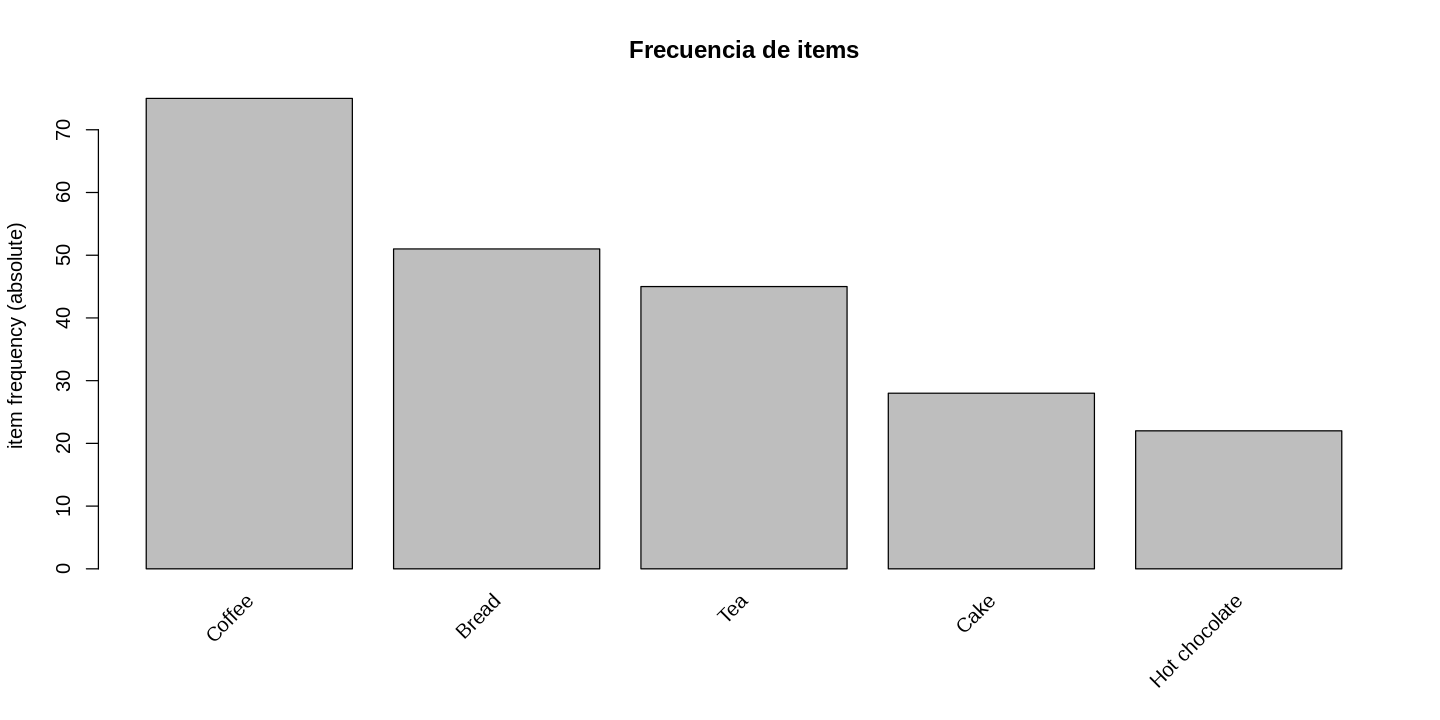

In [ ]:
# Respuesta

# (1p por filtrar)
df1 <- filter(trans_original, strtoi(hora) >= 7  & strtoi(hora) <=11)
df2 <- filter(trans_original, strtoi(hora) >= 12 & strtoi(hora) <=16)
df3 <- filter(trans_original, strtoi(hora) >= 17 & strtoi(hora) <=23)

# Opcion a) Sin convertir a transactions
# 1p c/u
df1 %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

df2 %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

df3 %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

# Opción b) convirtiendo a transactions

#0.5 c/u
tr1 <- as(split(df1[,"Item"], df1[,"Transaction"]), "transactions")
tr2 <- as(split(df2[,"Item"], df2[,"Transaction"]), "transactions")
tr3 <- as(split(df3[,"Item"], df3[,"Transaction"]), "transactions")

#0.5 c/u
itemFrequencyPlot(tr1,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

itemFrequencyPlot(tr2,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

itemFrequencyPlot(tr3,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

## Respuesta final (si no da respuesta y sólo muestra tablas o grágicos, descontar 1p)

#Si se observan cambios en los productos vendidos en cada horario definido.
#Siendo Coffe y Bread los dos más vendidos siempre, pero los siguientes 3 items varían:

#Horario1: Pastry, Tea, medialuna
#Horario2: Tea, cake, sandwich
#Horario3: Tea, cake, hot chocolate


**P6)** A continuación analizaremos la venta del Item Cake, para lo cual se asumirá una distribución binomial para un inventario fijo diario de Cakes. Para ello, primero deberá estimar la probabilidad diaria de que una compra contenga el item Cake.

**a) (3pts)** Genere un dataframe resumido que contenga el día (Date), el total de transacciones únicas (total_trx) y el total de transacciones que contienen el item Cake (trx_cake). Su dataframe debe lucir como el siguiente. <br>


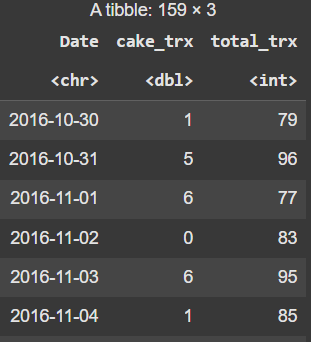

De ser útil puede considerar el uso de la función `n_distinct()`.

**NOTA:** Si hay una transacción que contenga más de un Cake, esta debe contabilizarse como una sola transacción con Cake.

**b) (2pts)** Determine la tasa de compra diaria de Cakes. Considere el promedio de `cake_trx/total_trx`. Adicionalmente genere el promedio de cake_trx y promedio de total_trx por separado.

In [ ]:
# Respuesta
## 3 pts para la tabla y 2 pts por el calculo de la tasa.
trans_original %>%
  group_by(Date,Transaction) %>%
  summarise(tiene_Cake = ifelse(sum(Item == "Cake")>=1,1,0)) %>%
  group_by(Date) %>%
  summarise(cake_trx = sum(tiene_Cake),
            total_trx = n_distinct(Transaction)) %>%
  ungroup() %>%
  summarise(cake_trx_prom = mean(cake_trx),
            total_trx_prom = mean(total_trx),
            tasa_cake = mean(cake_trx/total_trx))

`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


cake_trx_prom,total_trx_prom,tasa_cake
<dbl>,<dbl>,<dbl>
6.18239,59.5283,0.1062291


**c) (2pts)** El gerente del local decide mantener un stock fijo de 60 Cakes diarios.

Asuma que el total de Cakes vendidos por día, sigue una distribución binomial con parámetros `n = 60` y `p = mean(cake_trx/total_trx)`. ¿Cual es la probabilidad que se vedan 11 o más cakes? ¿y la probabilidad de que se vendan 6 o menos?. Interprete sus resultados.

In [ ]:
#Respuesta
1-pbinom(10,size = 60, prob = 0.1062291)# La prob. de que se vendan 11 o más es de approx. un 5%. Es decir, de cada 100 días de venta, se espera que en 5 de ellos se vendan 11 o más cakes del stock de 60.
pbinom(6,size = 60, prob = 0.1062291) # La prob. de que se vendan 6 o menos es de approx. un 54%. Es decir, de cada 100 días de venta, se espera que en 54 de ellos se vendan 6 o menos cakes del stock de 60.

[1] 0.04964739

[1] 0.5432275

**d) (1pts)** Recomendaría al gerente mantener el stock fijo de 60 cakes o lo aumentaría/disminuiría?. Esta es una pregunta de respuesta abierta, pero considere lo desarrollado anteriormente para guiar una recomendación.

In [ ]:
# Respuesta
# De lo anterior se puede observar que la venta de 11 o más es cercano al 5%, es decir, que hay una prob del 95% de vender 10 o menos. Esto podría sugerir un stock menor a modo de ahorrar costos en inventario y almacenamiento.
qbinom(0.95,size = 60, prob = 0.1062291)# Según el supuesto distribucional binomial, se tiene que bajo estas condiciones el percentil 95 corresponde a 10 unidades. Quizás una recomendación sería disminuir el stock a 10 unidades.


[1] 10

### Genereación de reglas

**P7)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a) (2pts)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P6)**?<br>
**b) (2pts)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P6)**? <br>
**c) (2pts)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P6)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [ ]:
# Respuesta
## a)
# Las asociaciones más frecuentes corresponden a {Bread} => {Coffee} ,
#salvo en el último horario donde la regla más frecuente es {Cake} => {Coffee}

# en esta ocasión es necesario convertir a objetos tipo transactions
tr1 <- as(split(df1[,"Item"], df1[,"Transaction"]), "transactions")
tr2 <- as(split(df2[,"Item"], df2[,"Transaction"]), "transactions")
tr3 <- as(split(df3[,"Item"], df3[,"Transaction"]), "transactions")


reglas_1 <- apriori( data=tr1,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2)
       )

reglas_2 <- apriori( data=tr2,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2)
       )

reglas_3 <- apriori( data=tr3,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2)
       )

Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[73 item(s), 2721 transaction(s)] done [0.00s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
   

In [ ]:
head(sort(reglas_1,by="support",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 1: {Bread} => {Coffee}
head(sort(reglas_2,by="support",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 2: {Bread} => {Coffee}
head(sort(reglas_3,by="support",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 3: {Cake} => {Coffee}

    lhs        rhs      support   confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.1010658 0.2879581  0.3509739 0.5467788 275  
    lhs        rhs      support    confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.08999803 0.2943445  0.3057575 0.6401363 458  
    lhs       rhs      support    confidence coverage  lift count
[1] {Cake} => {Coffee} 0.05860806 0.5714286  0.1025641 2.08 16   


In [ ]:
# Respuesta
## b)

head(sort(reglas_1,by="confidence",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 1:{Toast} => {Coffee}
head(sort(reglas_2,by="confidence",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 2:{Pastry} => {Coffee}
head(sort(reglas_3,by="confidence",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 3:{Postcard} => {Tshirt}

    lhs        rhs      support    confidence coverage  lift     count
[1] {Toast} => {Coffee} 0.03160603 0.7350427  0.0429989 1.395709 86   
    lhs         rhs      support    confidence coverage   lift   count
[1] {Pastry} => {Coffee} 0.02554529 0.5579399  0.04578503 1.2134 130  
    lhs           rhs      support    confidence coverage   lift count
[1] {Postcard} => {Tshirt} 0.02197802 0.6        0.03663004 7.8  6    


In [ ]:
#Respuesta
## c)
head(sort(reglas_1,by="lift",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 1:{Toast} => {Coffee}
head(sort(reglas_2,by="lift",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 2:{Cake} => {Tea}
head(sort(reglas_3,by="lift",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 3:{Tshirt} => {Postcard}

    lhs        rhs      support    confidence coverage  lift     count
[1] {Toast} => {Coffee} 0.03160603 0.7350427  0.0429989 1.395709 86   
    lhs       rhs   support    confidence coverage  lift    count
[1] {Cake} => {Tea} 0.03261938 0.2385057  0.1367656 1.40481 166  
    lhs         rhs        support    confidence coverage   lift count
[1] {Tshirt} => {Postcard} 0.02197802 0.2857143  0.07692308 7.8  6    


**P8)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente.

**a) (3pts)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b) (2pts)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.


In [ ]:
# Respuesta
## a)
reglas_coffe1 <- apriori( data=tr1,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2),
                  appearance = list(default="rhs",lhs="Coffee"),
                  control = list (verbose=F))
reglas_coffe2 <- apriori( data=tr2,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2),
                  appearance = list(default="rhs",lhs="Coffee"),
                  control = list (verbose=F))
reglas_coffe3 <- apriori( data=tr3,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2),
                  appearance = list(default="rhs",lhs="Coffee"),
                  control = list (verbose=F))

inspect(reglas_coffe1)
inspect(reglas_coffe2)
inspect(reglas_coffe3)

    lhs         rhs      support    confidence coverage  lift      count
[1] {Coffee} => {Pastry} 0.07203234 0.1367760  0.5266446 1.1142739 196  
[2] {Coffee} => {Bread}  0.10106578 0.1919051  0.5266446 0.5467788 275  
    lhs         rhs        support    confidence coverage  lift      count
[1] {Coffee} => {Sandwich} 0.06229122 0.1354701  0.4598153 1.1684869 317  
[2] {Coffee} => {Cake}     0.07191983 0.1564103  0.4598153 1.1436376 366  
[3] {Coffee} => {Tea}      0.05718216 0.1243590  0.4598153 0.7324801 291  
[4] {Coffee} => {Bread}    0.08999803 0.1957265  0.4598153 0.6401363 458  
    lhs         rhs             support    confidence coverage  lift      count
[1] {Coffee} => {Alfajores}     0.03296703 0.1200000  0.2747253 2.0475000  9   
[2] {Coffee} => {Hot chocolate} 0.03296703 0.1200000  0.2747253 1.4890909  9   
[3] {Coffee} => {Cookies}       0.03296703 0.1200000  0.2747253 1.6380000  9   
[4] {Coffee} => {Cake}          0.05860806 0.2133333  0.2747253 2.0800000 16   
[5] {C

**Respuesta**

**b)**
Esta es una pregunta abierta, y las opciones de respuestas pueden ser varias. A modo de ejemplo, basándose en el listado anterior, algunas opciones serían:

   1. Optar por la asociación con mayor lift,dado que se asume que todas las reglas ya cumplen el mínimo deseable de support y confidence <br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich}
       * Horario 3: {Coffee} =&gt; {Cake}
   2. Optar por aquellas relaciones con alto lift, pero que a la vez no se encuentren dentro de las más frecuentas (pregunta **P3.4.a** asumiendo que las relaciones frecuentes no es necesario potenciarlas aun más (todo dependerá del negocio):<br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich}
       * Horario 3: {Coffee} =&gt; {Alfajores}
